In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [104]:
path = 'C:\\Users\shakil\\Desktop\\academic lab\\images\\Lenna_(test_image).png'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (180, 180))

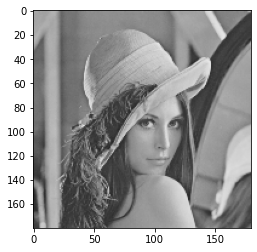

In [105]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [106]:
height, weight = image.shape

In [107]:
kernal = np.array(([0,-1,0], [-1,5,-1], [0,-1,0]), np.float32)

In [108]:
padding = kernal.shape[0] // 2

In [109]:
new_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

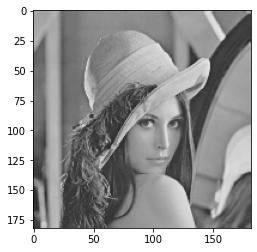

In [110]:
# plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [111]:
result = np.zeros((height, weight), np.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[170. 167. 168. ... 165. 212. 144.]
 [173. 169. 171. ... 195. 295. 235.]
 [166. 167. 161. ... 162.  35. -36.]
 ...
 [ 51.  58.  57. ...  41.  88. 116.]
 [ 69.  54.  62. ...  72. 117. 108.]
 [ 36.  78.  60. ... 127. 143. 132.]]


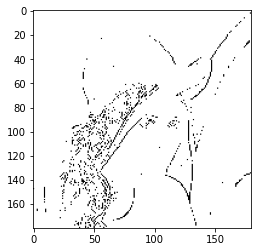

In [112]:
st = kernal.shape[0]//2
ed = kernal.shape[1]//2

for row in range(height):
  for col in range(weight):
    sum = 0
    for i in range(-st, ed+1, 1):
      for j in range(-st, ed+1, 1):
        sum += kernal[i+st][j+st] * new_image[row-i+st][col-j+st]
    result[row][col] = sum

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# print(result)

In [113]:
# for row in range(height):
#   for col in range(weight):
#     sum = 0
#     for i in range(kernal.shape[0]):
#       for j in range(kernal.shape[1]):
#         sum += kernal[i][j] * new_image[row + i][col + j]
#     result[row][col] = sum
#     # result[x, y] = np.sum(new_image[x:x+kernal.shape[0], y:y+kernal.shape[1]] * kernal)

# plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# print(result)

convolution with circulant matrix

In [114]:
path = 'C:\\Users\shakil\\Desktop\\academic lab\\images\\Lenna_(test_image).png'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (200, 200))
height, weight = image.shape
kernal = np.array(([0,-1,0], [-1,5,-1], [0,-1,0]), np.float32)
# kernal = np.array(([1,2,3], [4,5,6], [7,8,9]), np.float32)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [115]:
matrixKernal = np.zeros((height**2, weight**2), np.float32)

In [116]:
# creating the first row
# kernal will be square size of image
for i in range(kernal.shape[0]):
  for j in range(kernal.shape[1]):
    matrixKernal[0][i*height + j] = kernal[i][j]


In [117]:
for i in range(1, height**2):
  matrixKernal[i] = np.roll(matrixKernal[i-1], shift=1)
  # matrixKernal[i] = shift(matrixKernal[i-1], 1, cval=0)
  # matrixKernal[i][0] = matrixKernal[i-1][weight**2-1]
  # for j in range(1, weight**2):
  #   matrixKernal[i][j] = matrixKernal[i-1][j-1]
print(matrixKernal)

[[ 0. -1.  0. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0.  0.]]


In [118]:
# input image
# matImage = np.zeros((height*weight, 1), np.float32)
# for i in range(image.shape[0]*image.shape[1]):
#     matImage[i][0] = image[i//height][i%height]


matImage = image.flatten()
matImage = matImage.reshape(height*weight, 1)
# flattern() will create an 1D array from the input image
# reshape() will create a (height*weight,1) matrix from the 1D array

In [119]:
result = np.matmul(matrixKernal, matImage)

In [120]:
result = np.resize(result, (height, weight))
print(result)

[[ 164.  173.  173. ...  269.  207.  181.]
 [ 159.  169.  169. ...  113. -107.  242.]
 [ 166.  161.  173. ...   -9.  -64.  265.]
 ...
 [  54.   58.   77. ...  126.  159. -131.]
 [ -31.  -51.  -36. ...   70.   46.  336.]
 [ 273.  279.  271. ...  267.  163.  185.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


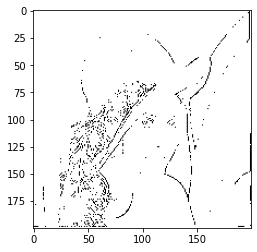

In [121]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))